***
# <h1 align="center">Trabajo Final </h1>
 <h2 align="center">Introducción a la Ciencia de Datos </h2>
<h3 align="center"> <font color='gray'>Azadian, Bordaberry, Etchegorry, Odizzio</font></h3>
<h4 align="center"> <font color='gray'>Noviembre 2020</font></h4>

***


</center><img src="https://i.ibb.co/1dLzxd8/Screen-Shot-2020-11-15-at-10-07-43-PM.png" alt="Screen-Shot-2020-11-15-at-10-07-43-PM" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'"

***
<br>

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, plot_roc_curve, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer


#!pip install missingno  (Si no lo tiene hay que instalarlo.)
import missingno as msno
import sympy as sy


***

# Analisis Exploratorio

### Investigamos los datos, sus variables y el dataset en general para familiarizarnos con los datos

In [390]:
data = pd.read_csv('data.csv',engine='python',sep=',')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,...,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no


## Descripcion de las variables:

- age: edad 
- job : tipo de trabajo 
- marital : estado civil 
- education: nivel educativo 
- default: ¿tiene crédito en mora? 
- housing: ¿tiene préstamo para vivienda? 
- loan: ¿tiene préstamo personal? 


- contact: tipo de contacto 
- month: último mes de contacto del año 
- day_of_week: último día de contacto de la semana 
- duration: duración último contacto, en segundos 


- campaign: número de contactos realizados durante esta campaña y para este cliente 
- pdays: número de días que pasaron desde la última vez que se contactó con el cliente desde una campaña anterior 
- previous: número de contactos realizados antes de esta campaña y para este cliente 
- poutcome: resultado de la campaña de marketing anterior 


- emp.var.rate: tasa de variación del empleo - indicador trimestral 
- cons.price.idx: índice de precios al consumidor - indicador mensual 
- cons.conf.idx: índice de confianza del consumidor - indicador mensual 
- euribor3m: euribor a 3 meses - indicador diario
- nr.employed: número de empleados – indicador trimestral 


- y - ¿El cliente ha suscrito un depósito a plazo? 

In [391]:
data.shape

In [392]:
data.nunique()

age                 77
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1460
campaign            41
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          311
nr.employed         11
y                    2
dtype: int64

In [393]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [394]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [395]:
data.housing.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [396]:
data.loan.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [397]:
data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [398]:
data.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [399]:
data = data.replace('unknown', np.nan)
data = data.replace('nonexistent', np.nan)

Vemos que a simple vista no hay missing values con NaN. Sin embargo, sí notamos que hay strings como 'unknown' o 'nonexistent'. Por este motivo decidimos pasar estos missing values a NaNs.

In [400]:
data.isnull().sum()

age                   0
job                 246
marital              60
education          1347
default            6875
housing             789
loan                789
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          28443
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [401]:
data.nunique()

age                 77
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1460
campaign            41
pdays               27
previous             8
poutcome             2
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          311
nr.employed         11
y                    2
dtype: int64

Ahora vemos que hay varias variables que son binarias, por lo que hacemos un one-hot encoding

## Cardinalizar las Variables

#### Utilizando Dummies y Label Encoder, codificamos todas las variables categoricas que nos parecio adecuado. 

data['default'] = pd.get_dummies(data['default'], drop_first=True)
data['loan'] = pd.get_dummies(data['loan'], drop_first=True)
data['housing'] = pd.get_dummies(data['housing'], drop_first=True)
data['contact'] = pd.get_dummies(data['contact'], drop_first=True)
data['y'] = pd.get_dummies(data['y'], drop_first=True)

Tambien aplicamos un label encoder para las variables categoricas con pocos valores unicos.

In [402]:
le = LabelEncoder()

data['job'] = pd.Series(le.fit_transform(data['job'][data['job'].notnull()]),
        index = data['job'][data['job'].notnull()].index).astype('int')

data['education'] = pd.Series(le.fit_transform(data['education'][data['education'].notnull()]),
        index = data['education'][data['education'].notnull()].index).astype('int')

data['marital'] = pd.Series(le.fit_transform(data['marital'][data['marital'].notnull()]),
        index = data['marital'][data['marital'].notnull()].index).astype('int')

data['default'] = pd.Series(le.fit_transform(data['default'][data['default'].notnull()]),
        index = data['default'][data['default'].notnull()].index).astype('Int64')

data['loan'] = pd.Series(le.fit_transform(data['loan'][data['loan'].notnull()]),
        index = data['loan'][data['loan'].notnull()].index).astype('int')

data['housing'] = pd.Series(le.fit_transform(data['housing'][data['housing'].notnull()]),
        index = data['housing'][data['housing'].notnull()].index).astype('int')

data['contact'] = pd.Series(le.fit_transform(data['contact'][data['contact'].notnull()]),
        index = data['contact'][data['contact'].notnull()].index).astype('int')


data['y'] = pd.Series(le.fit_transform(data['y'][data['y'].notnull()]),
        index = data['y'][data['y'].notnull()].index).astype('Int64')

data['poutcome'] = pd.Series(le.fit_transform(data['poutcome'][data['poutcome'].notnull()]),
        index = data['poutcome'][data['poutcome'].notnull()].index).astype('Int64')


data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,0.0,2.0,6.0,0,0.0,0.0,0,jul,tue,...,2,999,0,<NA>,1.4,93.918,-42.7,4.961,5228.1,0
1,39,1.0,2.0,0.0,<NA>,NaN,NaN,1,may,wed,...,1,999,0,<NA>,1.1,93.994,-36.4,4.857,5191.0,0
2,70,5.0,1.0,0.0,0,1.0,0.0,0,oct,mon,...,1,999,0,<NA>,-3.4,92.431,-26.9,0.739,5017.5,1
3,37,0.0,2.0,6.0,0,0.0,0.0,0,may,wed,...,4,999,0,<NA>,-1.8,92.893,-46.2,1.334,5099.1,0
4,48,0.0,1.0,3.0,0,0.0,0.0,1,nov,tue,...,1,999,2,0,-1.1,94.767,-50.8,1.049,4963.6,0


<table>
<tr><th>Diccionario Eduacation </td><td></td><td></th><th>Diccionario Education </td><td></td><td></th><th>Diccionario Marital </td><td></td><td></th><th>Binarios </th></tr>
<tr><td>
    
|Tipo| Numero|
|--|--|
|admin |0 |
|blue-collar|1|
|entrepreneur |2 |
|housemaid |3 |
|management |4 |
|retired |5 |
|self-employed|6|
|services |7 |
|student |8 |
|technician |9 |
|unemployed |10 |
 
</td><td></td><td></td><td>
    
|Tipo| Numero| 
|--|--|
|basic.4y|1 |
|basic.6y|2|
|basic.9y |3 |
|high.school |4 |
|illiterate |5 |
|professional.course |6 |
|university.degree|7|

</td><td></td><td></td><td>

|Tipo| Numero| 
|--|--|
|Divorced|0 |
|Married|1|
|Single |2 |

</td><td></td><td></td><td>

|Tipo| Numero| 
|--|--|
|No|0 |
|Si|1|


</td></tr> </table>

<br>

***

<br>

## Data Quality Report
### Investigo si los datos son continuos o categoricos

*** 
## Categoricos:
***
### Nominal:
- Job
- Marital
- Default
- Housing
- Loan
- Contact
- poutcome
- y

### Ordinal:
- Education
- Month
- Day


***
## Numerico:
***
### Discreto:
- Age
- Campaign
- pdays
- previous
- nr.employed

### Continuo:
- Duration 
- emp.var.rate
- cons.price.idx
- euribor3m

# Data Distribution

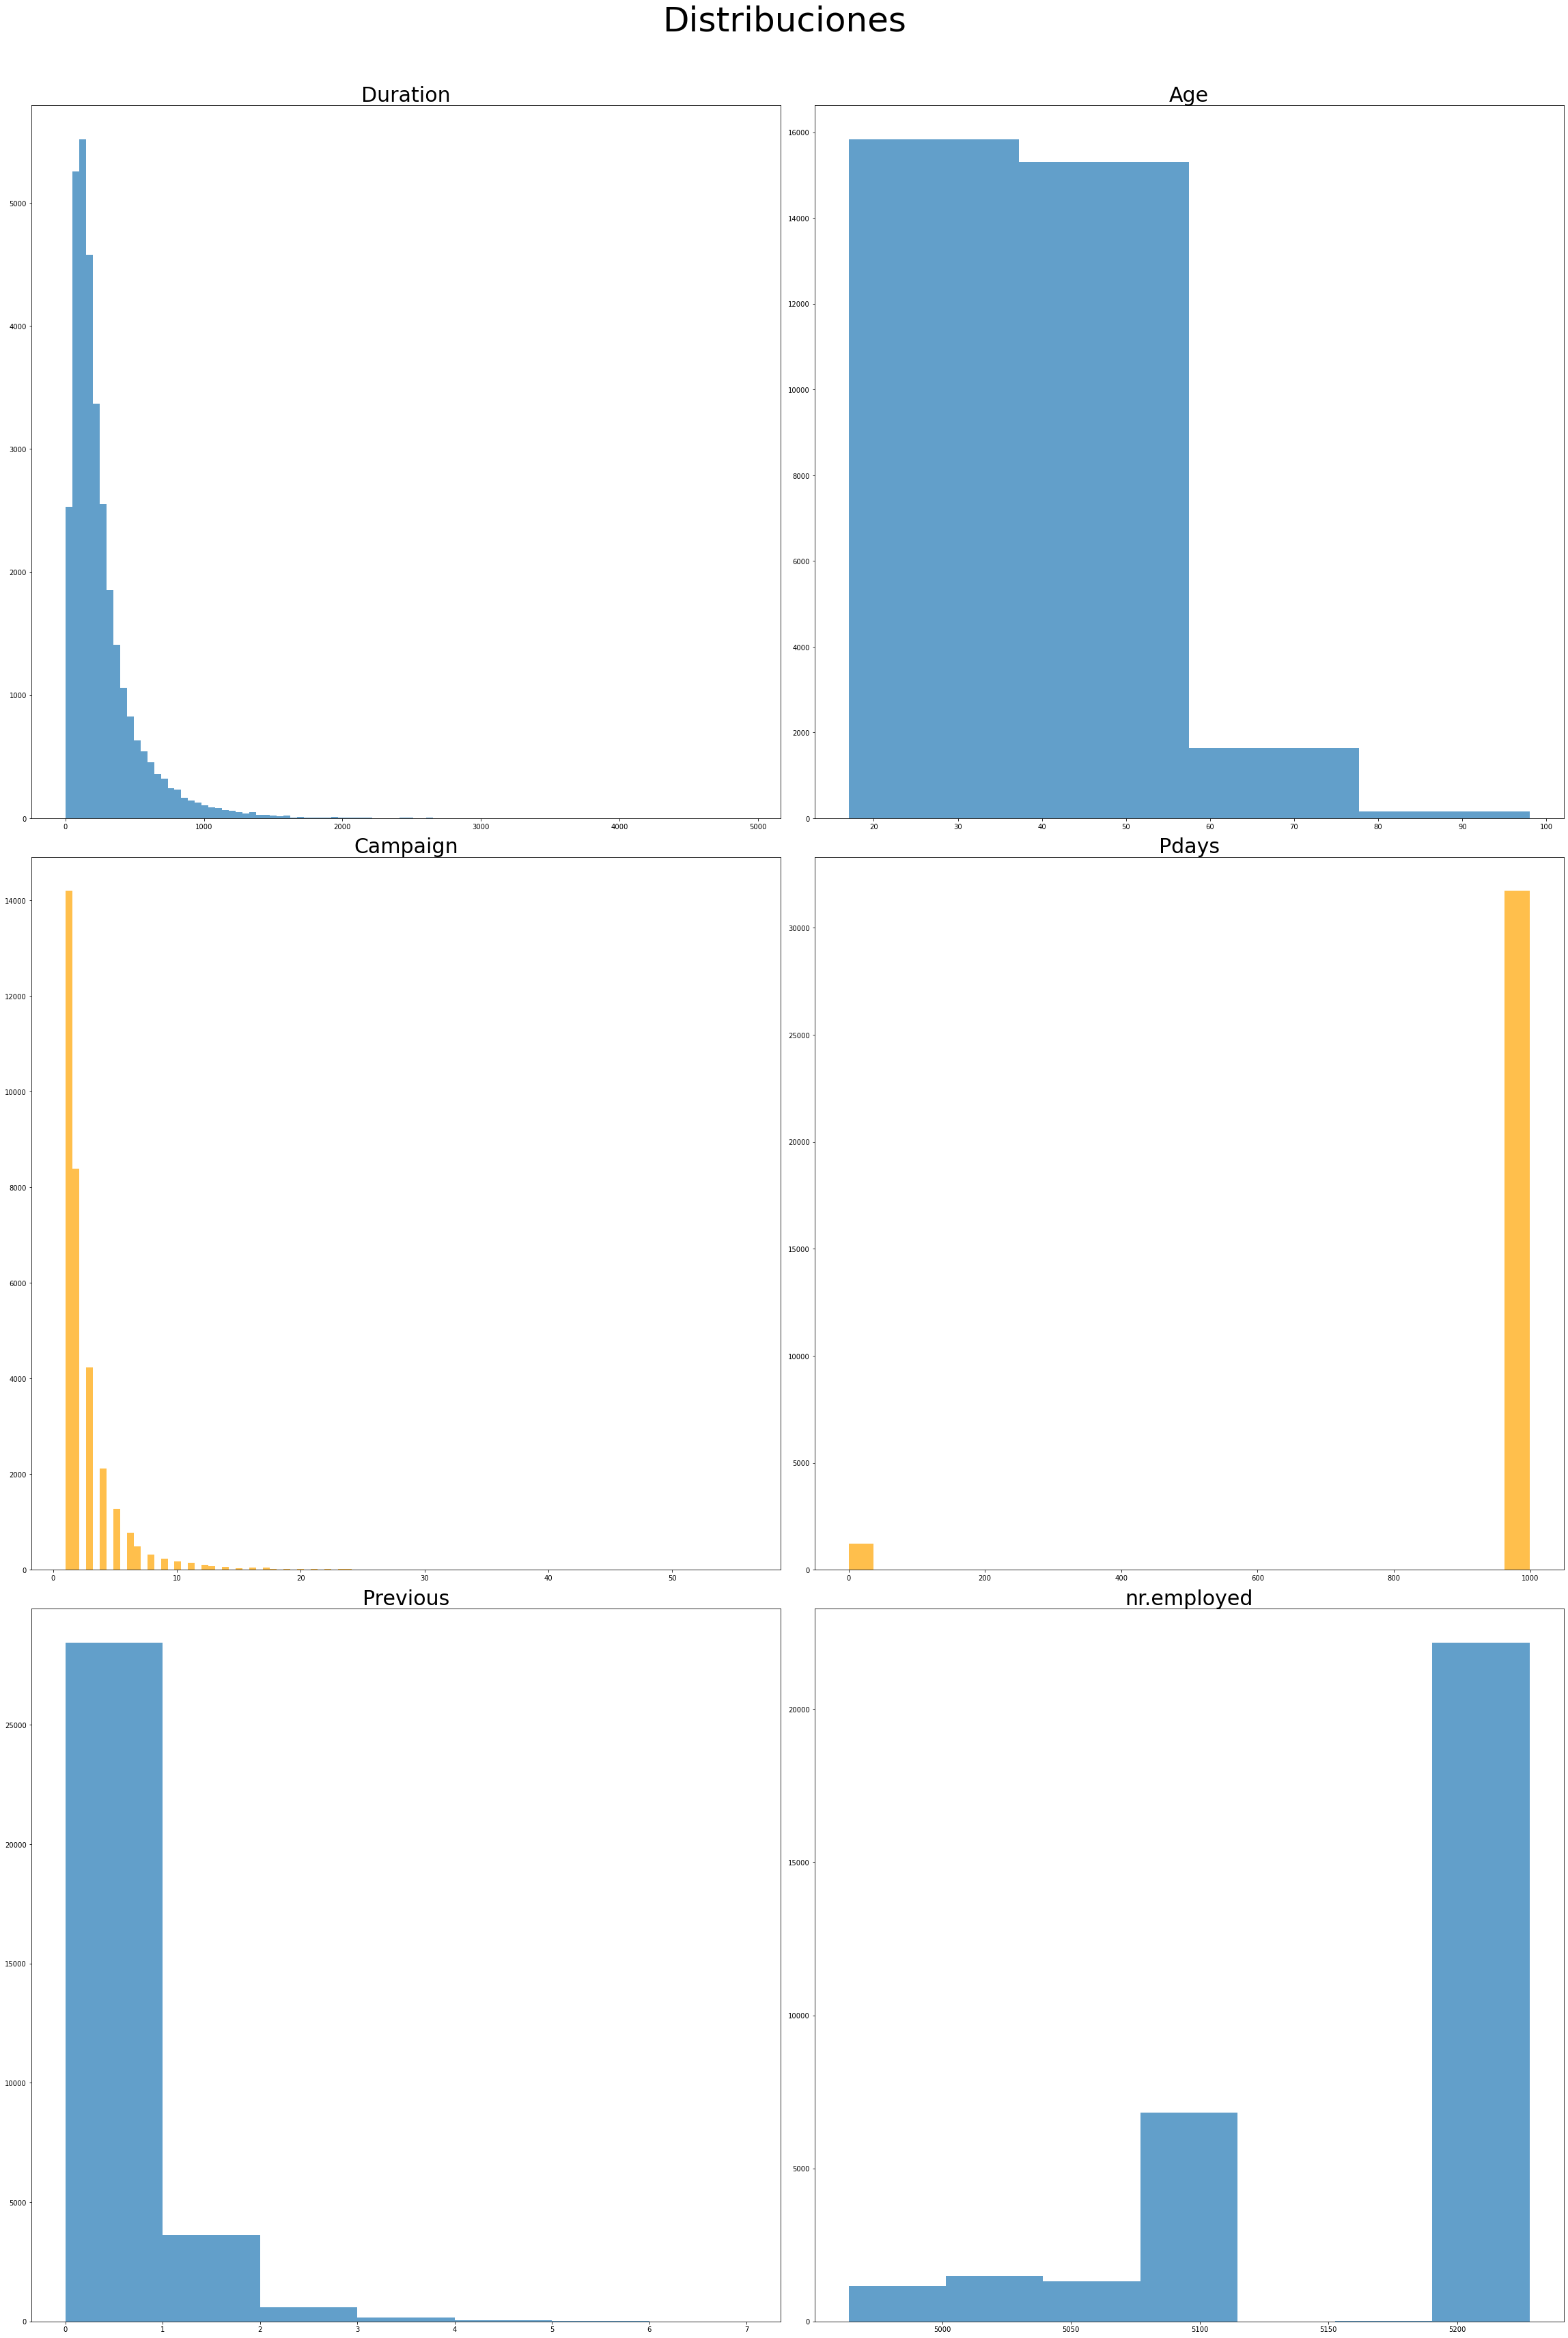

In [403]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(32,50)

axs[0,0].hist(data['duration'], bins=100, alpha =0.7)
axs[0,1].hist(data['age'], bins=4, alpha =0.7)
axs[1,0].hist(data['campaign'], bins=100,color ='orange', alpha =0.7)
axs[1,1].hist(data['pdays'], bins=27,color ='orange', alpha =0.7)
axs[2,0].hist(data['previous'], bins=7, alpha =0.7)
axs[2,1].hist(data['nr.employed'], bins=7, alpha =0.7)

axs[0,0].set_title('Duration', fontsize = 30)
axs[0,1].set_title('Age', fontsize = 30)
axs[1,0].set_title('Campaign', fontsize = 30)
axs[1,1].set_title('Pdays', fontsize = 30)
axs[2,0].set_title('Previous', fontsize = 30)
axs[2,1].set_title('nr.employed', fontsize = 30)

fig.suptitle("Distribuciones", fontsize = 50)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

## Distribucion de Edad

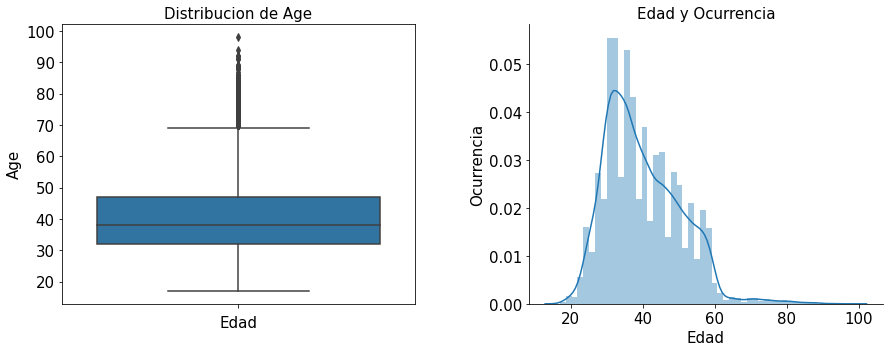

In [404]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('Edad', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribucion de Age', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Edad', fontsize=15)
ax2.set_ylabel('Ocurrencia', fontsize=15)
ax2.set_title('Edad y Ocurrencia', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=10)
plt.tight_layout() 

In [405]:
data['age'].value_counts()

31    1562
32    1492
33    1466
36    1421
35    1405
      ... 
91       2
17       2
87       1
98       1
94       1
Name: age, Length: 77, dtype: int64

La variabe edad, tenia dos clientes menores de edad, sin embargo suponemos que es un tipo de cuenta especial y no lo consideramos un valor atípico.

Vamos a dividir la edad en distintos bins de misma longitud.

In [406]:
data['age']= pd.cut(data['age'] , 4).cat.codes



In [407]:
data['age'].value_counts()

0    15836
1    15317
2     1642
3      155
Name: age, dtype: int64

## Distribucion de Duration

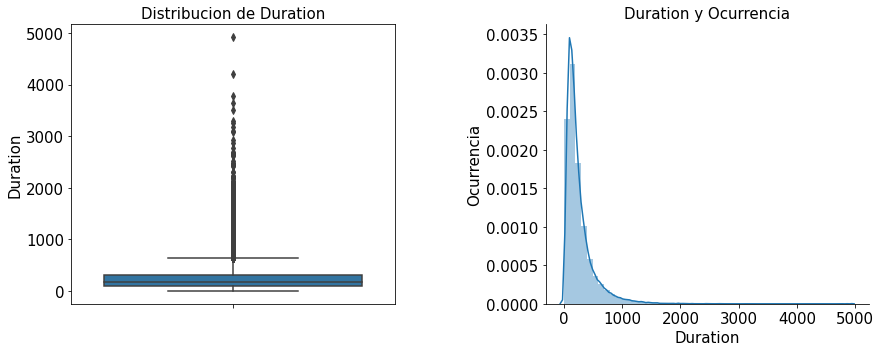

In [408]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = data, orient = 'v', ax = ax1)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Distribucion de Duration', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Ocurrencia', fontsize=15)
ax2.set_title('Duration y Ocurrencia', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=10)
plt.tight_layout() 

- Es una positive skewed distribution
- La variable duration tiene una cantidad considerable de outliers. 
- No podemos asegurar que estos datos son un error, la duracion de una llamada puede llegar a durar 5000 segundos (1hr 23 min) en algun caso extremo.

In [409]:
data.duration.describe()

count    32950.000000
mean       257.240728
std        257.171015
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [410]:
sum(((data['duration'] > 3+ 1.5*(319-103)))==True)

- 7903 son outliers (duration)

In [411]:
sum(((data['duration'] > 3+ 1.5*(319-103)) & (data['y'] == 1))==True)

2338

- De esos 7903, 2338 compraron el producto ==> 2338/7903= 0.2958 ==> un 29,58% de los que son outliers, compraron el producto.

- 3681 compraron el producto en total ==> 2338/3681= 0,6352 ==> un 63,52% de los que compraron el producto tuvieron llamadas largas (outliers)

#### 6 de cada 10 personas que compraron el producto tuvieron llamadas largas (son outliers). Esto seria esprable que si alguien vaya comprar el producto este mas tiempo hablando.

#### 7 de cada 10 de los outliers, no compraron el producto. 

## Distribucion de Campaign

In [412]:
data['campaign'].value_counts()

1     14200
2      8391
3      4233
4      2118
5      1277
6       776
7       498
8       320
9       239
10      184
11      151
12      104
13       72
14       58
17       50
16       44
15       39
18       26
20       22
19       20
21       20
22       15
23       13
24       13
27        9
28        8
26        7
29        7
31        6
25        6
30        5
32        4
40        2
42        2
43        2
35        2
34        2
33        2
39        1
37        1
56        1
Name: campaign, dtype: int64

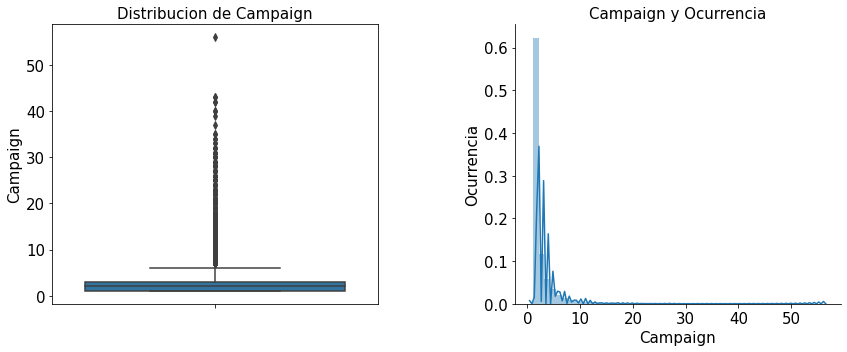

In [413]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=15)
ax1.set_ylabel('Campaign', fontsize=15)
ax1.set_title('Distribucion de Campaign', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Campaign', fontsize=15)
ax2.set_ylabel('Ocurrencia', fontsize=15)
ax2.set_title('Campaign y Ocurrencia', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=10)
plt.tight_layout() 

In [414]:
data.campaign.describe()

count    32950.000000
mean         2.571411
std          2.784660
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [415]:
sum(((data['campaign'] > 3+ 1.5*(3-1)))==True)

- 1955 son outliers

In [416]:
sum(((data['campaign'] > 3+ 1.5*(3-1)) & (data['y'] == 1))==True)

92

- De los 1955 outliers, 92 compraron el producto
- 6% de los outliers compraron el producto. 

La variable campaign tiene valores muy altos que podrian ser considerados atipicos, sin embargo, es posible que un cliente halla recibido más de 40 llamadas si es que estaba muy interesado o preocupado por invertir en un plazo fijo. Quizas, se cuentan tambien las llamadas perdidas.

# Distribucion  para Pdays

In [417]:
data['pdays'].value_counts()

999    31723
3        360
6        336
4         93
9         52
2         50
7         49
12        48
5         43
10        39
13        28
1         21
11        21
15        16
14        15
8         15
0         11
16         8
17         6
18         5
19         3
21         2
22         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

En Pdays, existe un grupo de clientes que la ultima vez contactado fue hace mucho 999. 

**Supuesto:** Creemos que el 999 es un valor techo para todos las personas que no fueron contactadas nunca más o mayores a 999.

Existen 31723 clientes que tiene este valor de 999, lo que nos dice que solo el 3,775% de los clientes fueron contactados por segunda vez. 

In [418]:
#Hacemos one-hot econding para top categories
data['pdays'] = data['pdays'].where(data.pdays == 999, 1) 
data['pdays'] = data['pdays'].replace(999, 0)
data.pdays.value_counts() 

0    31723
1     1227
Name: pdays, dtype: int64

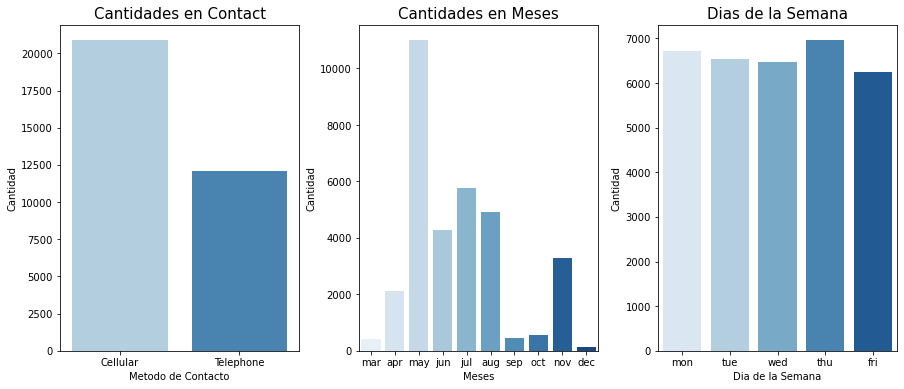

In [419]:
fig, (ax1, ax3, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data['contact'], ax = ax1, palette = 'Blues')
ax1.set_xlabel('Metodo de Contacto', fontsize = 10)
ax1.set_ylabel('Cantidad', fontsize = 10)
ax1.set_title('Cantidades en Contact', fontsize = 15)
ax1.tick_params(labelsize=10)
ax1.set_xticklabels(['Cellular','Telephone'])

sns.countplot(data['day_of_week'], ax = ax2,order = ['mon','tue','wed','thu','fri'], palette = 'Blues')
ax2.set_xlabel('Dia de la Semana', fontsize = 10)
ax2.set_ylabel('Cantidad')
ax2.set_title('Dias de la Semana', fontsize = 15)
ax2.tick_params(labelsize=10)

sns.countplot(data['month'], ax = ax3, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'Blues')
ax3.set_xlabel('Meses', fontsize = 10)
ax3.set_ylabel('Cantidad')
ax3.set_title('Cantidades en Meses', fontsize = 15)
ax3.tick_params(labelsize=10)


plt.subplots_adjust(wspace=0.25)

- Mayor cantidad de personas fueron contactadas por celular
- La mayor cantidad de personas fue contactado en Mayo.
- Los meses de invierno son los que concentran más llamadas.
- No se contactaron durante los meses de Enero y Febrero
- Solo llaman dias laborales de la semana: mon, tue, wed, thu, fri.
- Distribucion uniforme en los dias donde se fue contactado


In [420]:
def arreglar_meses(x):
    if x == "ene":
        return 1
    elif x == "feb":
        return 2
    elif x == "mar":
        return 3
    elif x == "apr":
        return 4
    elif x == "may":
        return 5
    elif x == "jun":
        return 6
    elif x == "jul":
        return 7
    elif x == "aug":
        return 8
    elif x == "sep":
        return 9
    elif x == "oct":
        return 10
    elif x == "nov":
        return 11
    elif x == "dec":
        return 12
    elif x < 13:
        return x
data["month"] = data["month"].apply(arreglar_meses)

In [421]:
def arreglar_dias(x):           #Lunes = 0
    if x == "mon":              #Martes = 1 
        return 0                #Miercoles = 2
                                #Jueves = 3 
    elif x == 'tue':            #Viernes = 4 
        return 1
    elif x == 'wed':
        return 2
    elif x == 'thu':
        return 3
    elif x == 'fri':
        return 4
    elif x < 5:
        return x
data["day_of_week"] = data["day_of_week"].apply(arreglar_dias)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0.0,2.0,6.0,0,0.0,0.0,0,7,1,...,2,0,0,<NA>,1.4,93.918,-42.7,4.961,5228.1,0
1,1,1.0,2.0,0.0,<NA>,NaN,NaN,1,5,2,...,1,0,0,<NA>,1.1,93.994,-36.4,4.857,5191.0,0
2,2,5.0,1.0,0.0,0,1.0,0.0,0,10,0,...,1,0,0,<NA>,-3.4,92.431,-26.9,0.739,5017.5,1
3,0,0.0,2.0,6.0,0,0.0,0.0,0,5,2,...,4,0,0,<NA>,-1.8,92.893,-46.2,1.334,5099.1,0
4,1,0.0,1.0,3.0,0,0.0,0.0,1,11,1,...,1,0,2,0,-1.1,94.767,-50.8,1.049,4963.6,0
5,1,7.0,1.0,3.0,<NA>,0.0,1.0,0,7,0,...,4,0,0,<NA>,1.4,93.918,-42.7,4.960,5228.1,0
6,0,7.0,1.0,3.0,0,1.0,0.0,0,7,4,...,1,0,0,<NA>,1.4,93.918,-42.7,4.957,5228.1,0
7,1,0.0,0.0,3.0,0,1.0,0.0,1,6,3,...,1,0,0,<NA>,1.4,94.465,-41.8,4.961,5228.1,1
8,0,6.0,2.0,6.0,0,1.0,0.0,0,6,4,...,5,0,0,<NA>,-2.9,92.963,-40.8,1.268,5076.2,0
9,0,1.0,2.0,2.0,0,0.0,0.0,0,7,0,...,5,0,0,<NA>,1.4,93.918,-42.7,4.960,5228.1,0


[Text(0, 0, 'Divorciado'), Text(0, 0, 'Casado'), Text(0, 0, 'Soltero')]

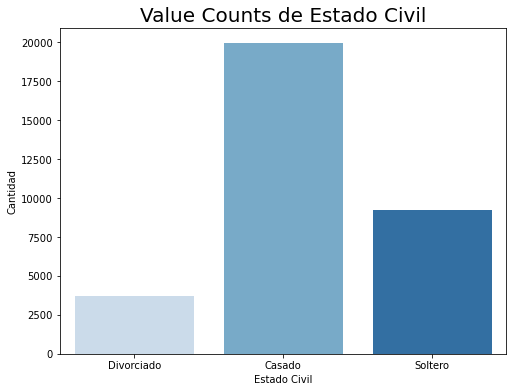

In [422]:
fig, (ax1) = plt.subplots(figsize = (8,6))
sns.countplot(data['marital'], ax = ax1, palette = 'Blues')
ax1.set_xlabel('Estado Civil', fontsize = 10)
ax1.set_ylabel('Cantidad', fontsize = 10)
ax1.set_title('Value Counts de Estado Civil', fontsize = 20)
ax1.tick_params(labelsize=10)
ax1.set_xticklabels(['Divorciado','Casado','Soltero'])

In [423]:
data['marital'].value_counts()

1.0    19944
2.0     9242
0.0     3704
Name: marital, dtype: int64

- La mayor cantidad de clientes son Casados, seguidos de Divorciados y Solteros.

## Missing Values

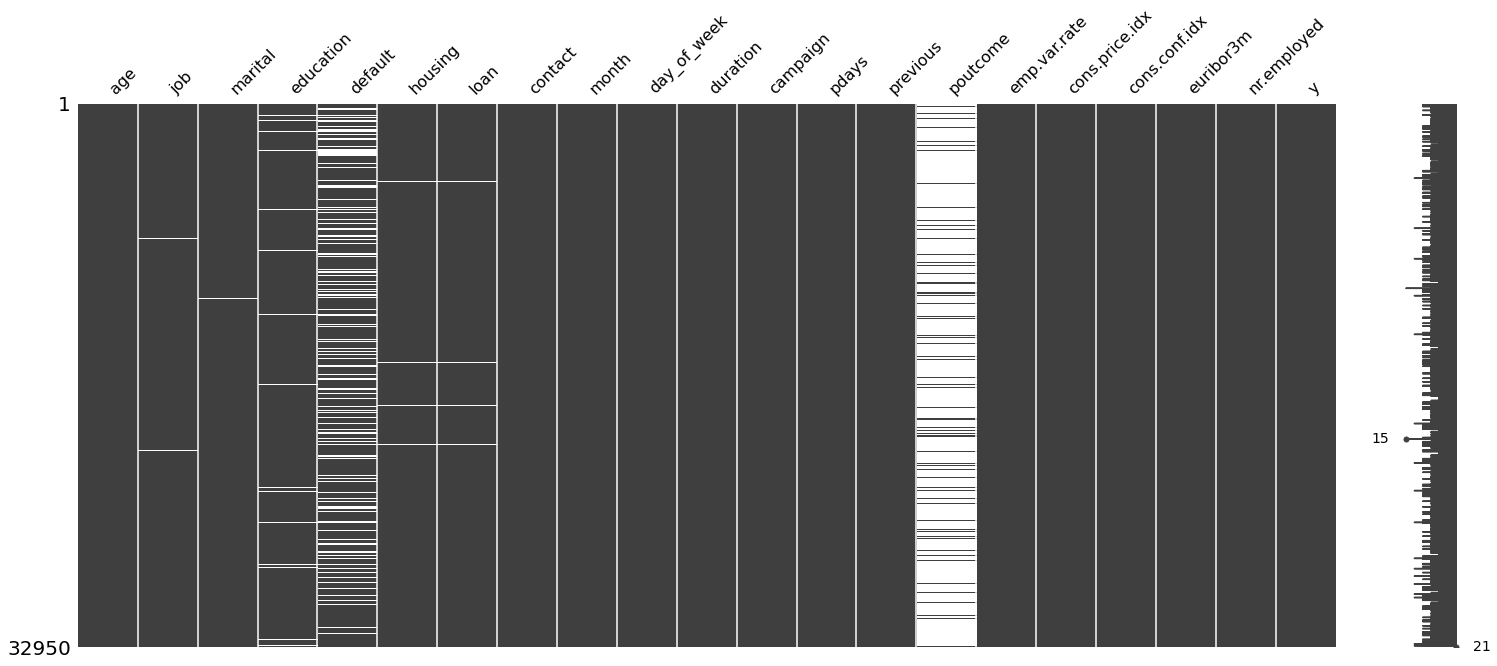

In [424]:
msno.matrix(data)

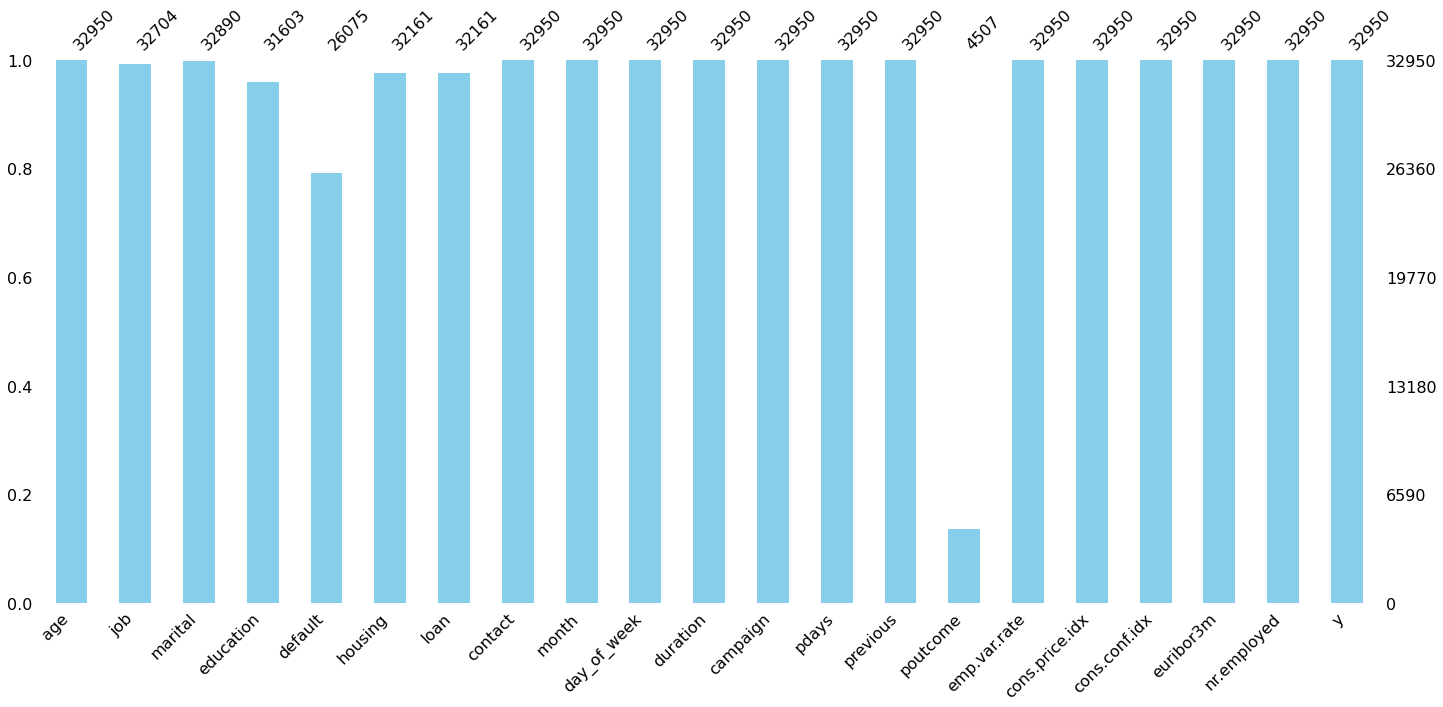

In [425]:
msno.bar(data, color = 'skyblue')

- Poutcome y Default son los que más missing values tienen

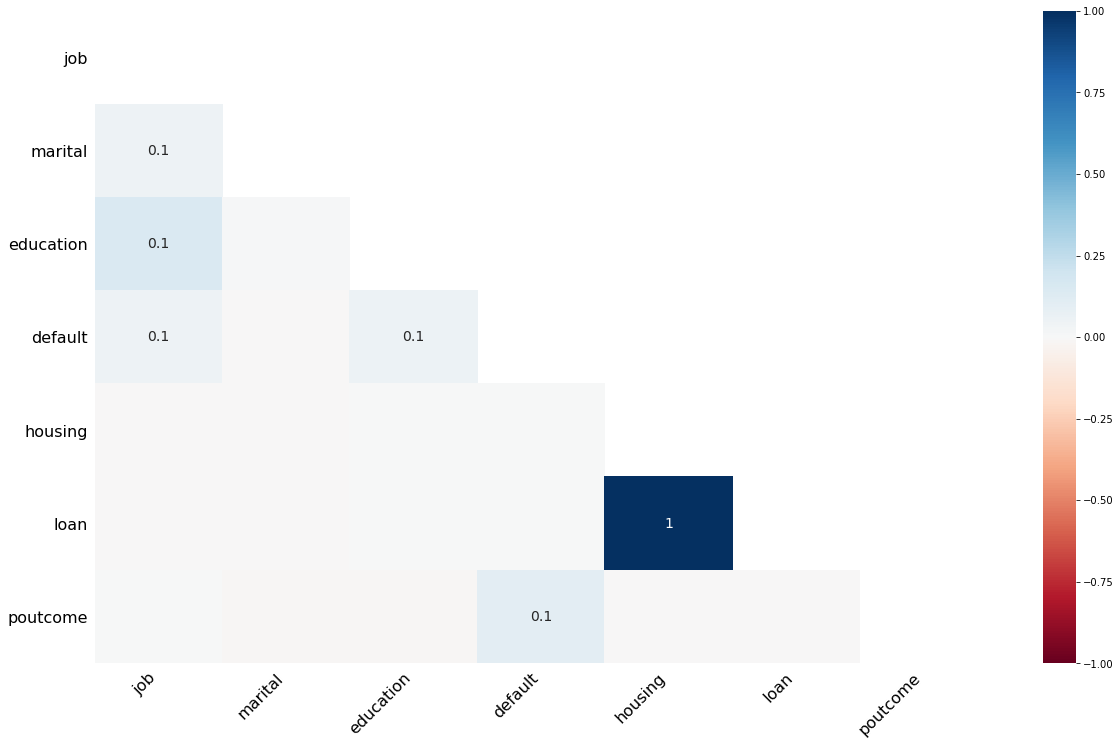

In [426]:
msno.heatmap(data)

- Vemos que hay una relacion en los datos faltantes de 1 entre housing y loan.
- Si falta el dato de loan, falta el de housing

In [427]:
housingloan = pd.DataFrame()
housingloan['housing'] = data['housing']
housingloan['loan'] = data['loan']
housingloan = housingloan[housingloan['housing'].notna()]
housingloan = housingloan[housingloan['loan'].notna()]

In [428]:
column_1 = housingloan["housing"].astype(int)
column_2 = housingloan["loan"].astype(int)
correlation = column_1.corr(column_2)
print(correlation)

0.04841044622574367


Evaluamos a ver si habia correlacion entre los datos existentes de loan y housing para evaluar si eran las mismas variables o tenian muchas igualdades. Son distintas

In [429]:
data['default'].value_counts()

#La variable default solo tiene una persona que no ha pagado y 6875 missing values. Por eso, esta variable no sirve.



0    26074
1        1
Name: default, dtype: Int64

In [430]:
data['default'].isnull().sum()

6875

In [431]:
data = data.drop(['default','poutcome'],axis= 1)

In [432]:
data['marital'] = data['marital'].replace(np.nan, int(data['marital'].mode()))
data['job'] = data['job'].replace(np.nan, int(data['job'].mode()))

- Normalizamos los datos.
- Imputamos los datos de Education, Loan y Housing usando K nearest neighbour

In [433]:
data_normalized = MinMaxScaler().fit_transform(data)

columns = data.columns
imputer = KNNImputer(n_neighbors=2)

data_normalized = pd.DataFrame(data = imputer.fit_transform(data_normalized), columns = columns)
data.loc[:,['education']] = np.round(MinMaxScaler().fit(data.loc[:,['education']]).inverse_transform(data_normalized.loc[:,['education']]))
data[['loan', 'housing']] = np.round(data_normalized[['loan', 'housing']])

<br>
<br>
<br>

# Evaluacion de las Variables y su Relacion con la Variable de Salida 'Y'
<br>

***



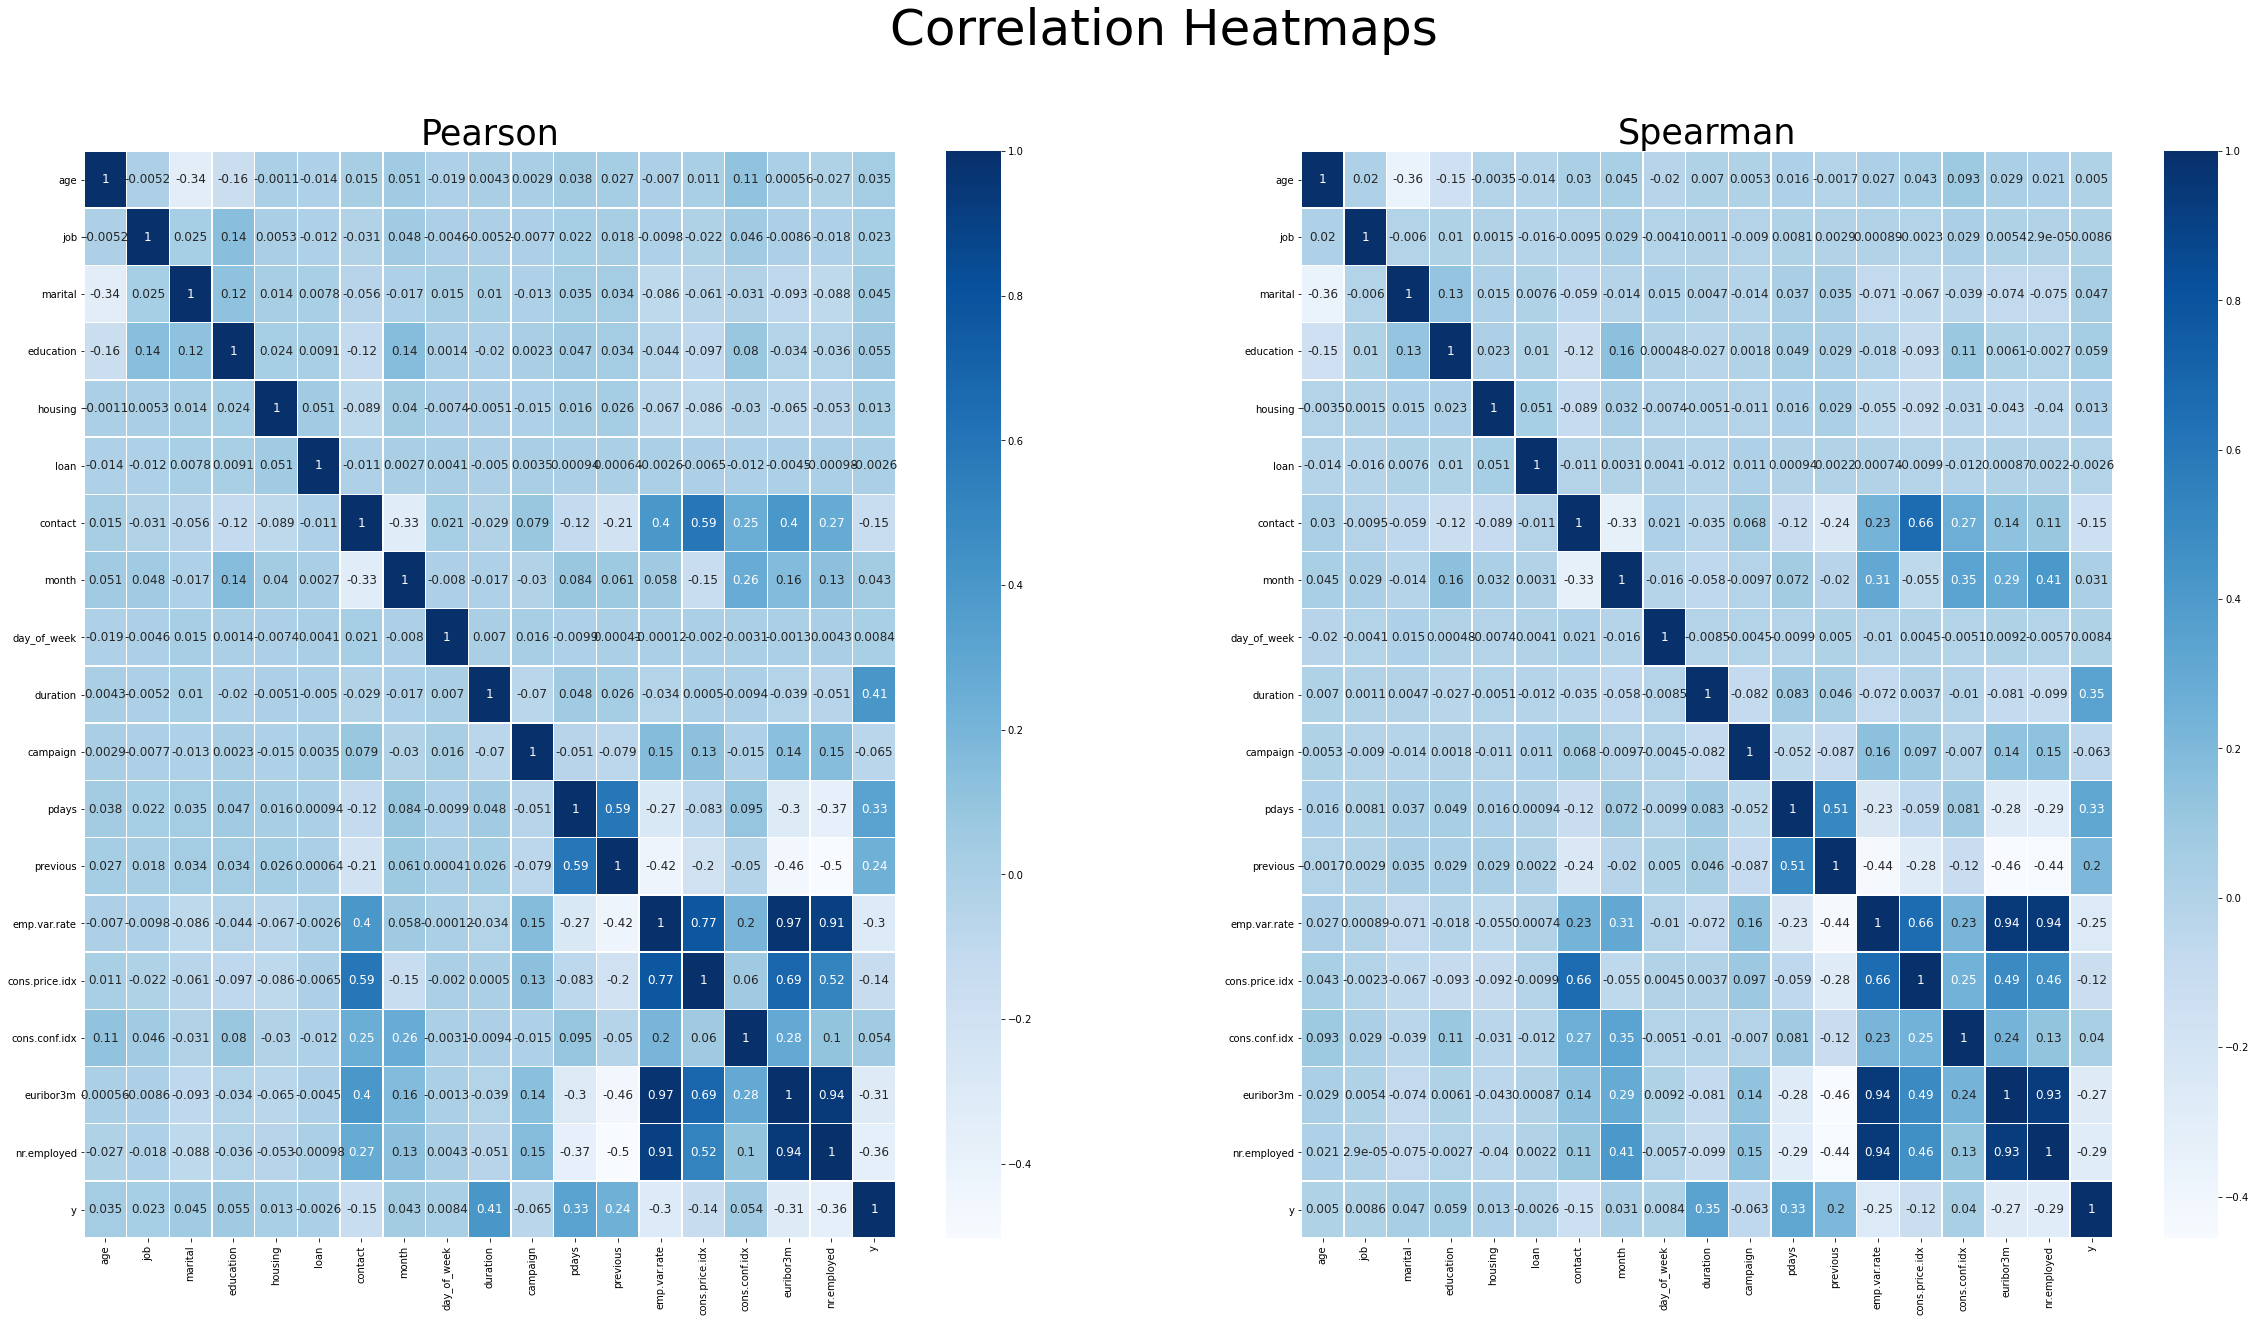

In [434]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (40, 20))
sns.heatmap(data.corr(), ax=ax1, linewidth =.5,annot = True, annot_kws={"fontsize":12}, cmap = 'Blues')
sns.heatmap(data.corr(method = 'spearman'), ax=ax2, linewidth =.5, annot = True, annot_kws={"fontsize":12}, cmap = 'Blues')
ax1.set_title('Pearson', fontsize = 35)
ax2.set_title('Spearman', fontsize = 35)
fig.suptitle('Correlation Heatmaps', fontsize=50)
plt.show()

- emp var rate, euriborn, nr employed, cns price index son parecidas. 
- Delta empleo tri, tasa de interes tres meses, numero de empleados trimestral. 

- previous, p_days parecidas.

### Realizamos una particion del dataframe. Pero antes de hacer esto, imputamos algunos datos faltantes en el Dataframe original para no tener un abuso de codigo.

In [435]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Particion

- Hacemos dos particiones del dataframe, uno con quienes no se subscribieron y otro con quienes si, con el objetivo de hacer un mejor análisis.

In [436]:
no_subs = data[data['y']== 0]
si_subs = data[data['y']== 1]
si_subs

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2,2,5.0,1.0,0.0,1.0,0.0,0,10,0,131,1,0,0,-3.4,92.431,-26.9,0.739,5017.5,1
7,1,0.0,0.0,3.0,1.0,0.0,1,6,3,1224,1,0,0,1.4,94.465,-41.8,4.961,5228.1,1
21,1,1.0,1.0,2.0,1.0,0.0,0,4,3,1365,2,0,1,-1.8,93.075,-47.1,1.410,5099.1,1
86,1,0.0,1.0,6.0,1.0,0.0,0,11,1,255,1,0,0,-3.4,92.649,-30.1,0.715,5017.5,1
89,2,5.0,2.0,6.0,0.0,0.0,0,11,3,253,1,0,2,-3.4,92.649,-30.1,0.714,5017.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32901,0,7.0,1.0,3.0,1.0,0.0,0,5,2,611,1,0,1,-1.8,92.893,-46.2,1.334,5099.1,1
32903,0,0.0,2.0,6.0,1.0,1.0,0,8,2,467,1,0,0,1.4,93.444,-36.1,4.964,5228.1,1
32939,0,4.0,1.0,6.0,0.0,0.0,0,3,3,148,1,0,2,-1.8,93.369,-34.8,0.654,5008.7,1
32946,3,5.0,0.0,5.0,1.0,0.0,0,3,1,591,1,0,1,-1.8,93.369,-34.8,0.655,5008.7,1


## Previous 

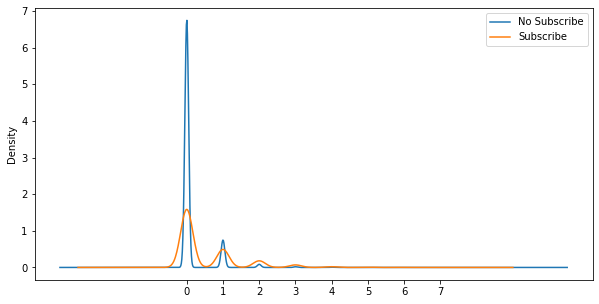

In [437]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)

fig = no_subs['previous'].plot(kind='kde', legend=True, label='No Subscribe')
fig = si_subs['previous'].plot(kind='kde', legend=True, label='Subscribe')
plt.xticks(np.linspace(0,7,8))
plt.show()

In [438]:
data['previous'].value_counts()

0    28443
1     3642
2      609
3      179
4       57
5       15
6        4
7        1
Name: previous, dtype: int64

- Se ve una clara diferencia en que no se suscriben aquellos que no han sido contactados previamente.
- Va a ayudar a predecir y discernir a aquellos

## Marital

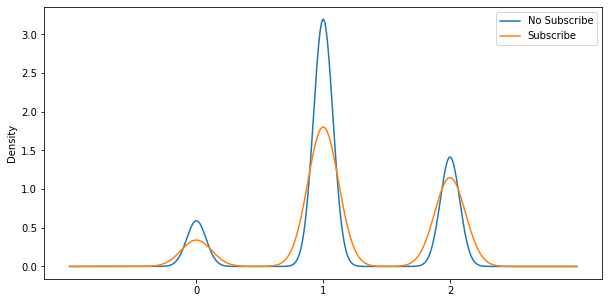

In [439]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)
fig = no_subs['marital'].plot(kind='kde', legend=True, label='No Subscribe')

fig = si_subs['marital'].plot(kind='kde', legend=True, label='Subscribe')
plt.xticks(np.linspace(0,2,3))
plt.show()

- Hay bastantes mas casados que no se suscriben que de los que si. 
- En caso de solteros o divorciados no se evidencia suficiente diferencia.
- Variable puede ayudar a decidir entre los que estan casados

## Jobs

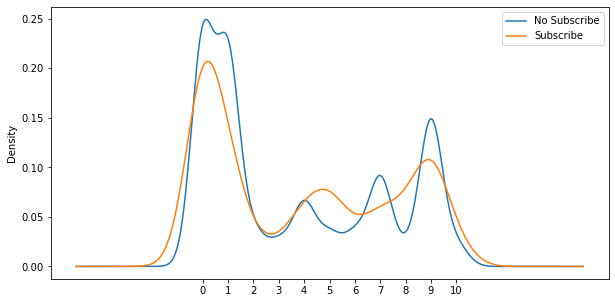

In [440]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)
fig = no_subs['job'].plot(kind='kde', legend=True, label='No Subscribe')
fig = si_subs['job'].plot(kind='kde', legend=True, label='Subscribe')

plt.xticks(np.linspace(0,10,11))
plt.show()

Este grafico no sirve. Demasiadas variables. Se tendria que hacer uno de barras que se sobrepongan. 

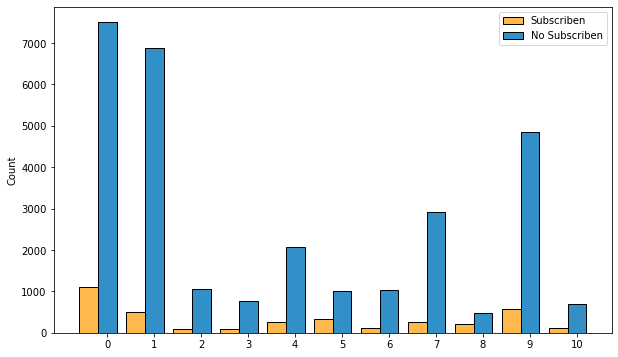

In [441]:
jobs_si = si_subs.groupby(['job']).count()
jobs_no = no_subs.groupby(['job']).count()
arr1 = jobs_si["y"].to_numpy()
arr2 = jobs_no["y"].to_numpy()

barWidth = 0.4
# The x position of bars
r1 = np.arange(len(arr1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(10,6)) 
# Create blue bars
plt.bar(r1, arr1, width = barWidth, color = '#ffb84d', edgecolor = 'black', label='Subscriben')
# Create cyan bars
plt.bar(r2, arr2, width = barWidth, color = '#3090C7', edgecolor = 'black', label='No Subscriben')
#
plt.xticks([r + barWidth for r in range(len(arr1))], ['0', '1', '2','3','4','5', '6', '7','8','9','10','11'])
plt.ylabel('Count')
plt.legend()
# Show graphic
plt.show()

## Mes del Año Desde Último Contacto

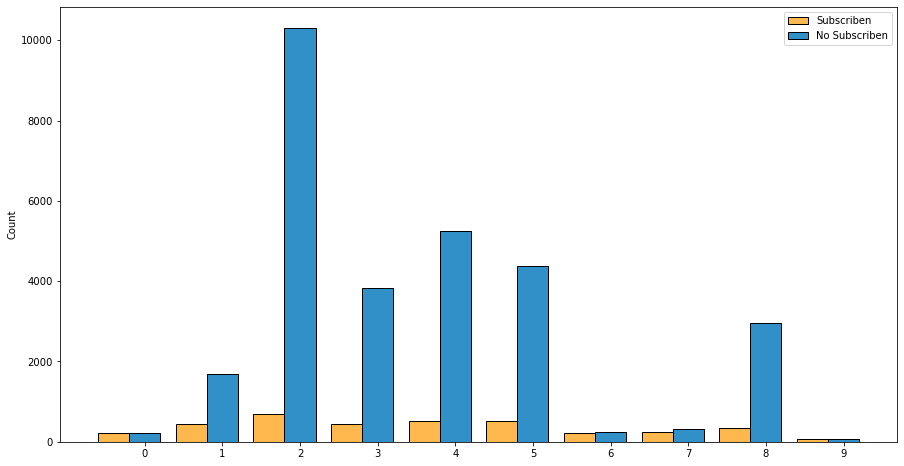

In [442]:
meses_si = si_subs.groupby(['month']).count()
meses_no = no_subs.groupby(['month']).count()
arr1 = meses_si["y"].to_numpy()
arr2 = meses_no["y"].to_numpy()

barWidth = 0.4
# The x position of bars
r1 = np.arange(len(arr1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(15,8)) 
# Create blue bars
plt.bar(r1, arr1, width = barWidth, color = '#ffb84d', edgecolor = 'black', label='Subscriben')
# Create cyan bars
plt.bar(r2, arr2, width = barWidth, color = '#3090C7', edgecolor = 'black', label='No Subscriben')
#
plt.xticks([r + barWidth for r in range(len(arr1))], ['0', '1', '2','3','4','5', '6', '7','8','9'])
plt.ylabel('Count')
plt.legend()
# Show graphic
plt.show()

- 33% de las personas que se subsribieron fueron contactadas por ultima vez en Mayo.
- Otro mes popular es Julio con 17%
- Desde Diciembre a Marzo, hubo pocos o ninguna subscripcion 
- Septiembre y Octubre tuvieron pocas subscripciones

## Dia de la Semana desde Ultimo Contacto

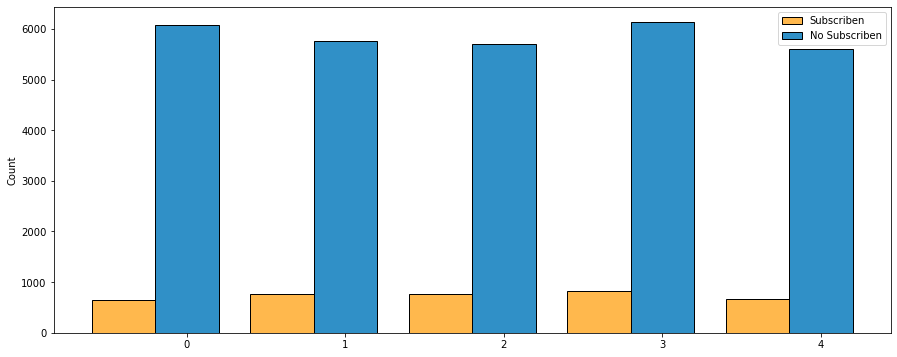

In [443]:
dias_si = si_subs.groupby(['day_of_week']).count()
dias_no = no_subs.groupby(['day_of_week']).count()
arr1 = dias_si["y"].to_numpy()
arr2 = dias_no["y"].to_numpy()

barWidth = 0.4
# The x position of bars
r1 = np.arange(len(arr1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(15,6)) 
# Create blue bars
plt.bar(r1, arr1, width = barWidth, color = '#ffb84d', edgecolor = 'black', label='Subscriben')
# Create cyan bars
plt.bar(r2, arr2, width = barWidth, color = '#3090C7', edgecolor = 'black', label='No Subscriben')
#
plt.xticks([r + barWidth for r in range(len(arr1))], ['0', '1', '2','3','4'])
plt.ylabel('Count')
plt.legend()
# Show graphic
plt.show()

## Loan

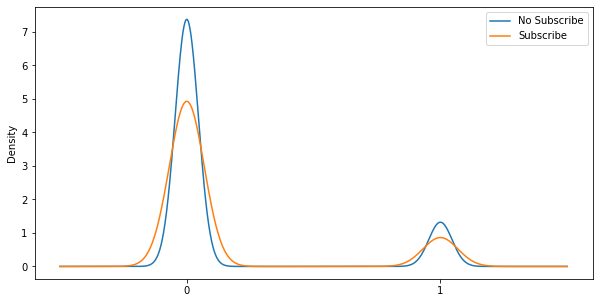

In [444]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)
fig = no_subs['loan'].plot(kind='kde', legend=True, label='No Subscribe')

fig = si_subs['loan'].plot(kind='kde', legend=True, label='Subscribe')
plt.xticks(np.linspace(0,1,2))
plt.show()

- Las personas que tomaron no tomaron prestamo, tienden a ser los que se subsriben más al deposito en plazo fijo. 
- Esto tiene mucho sentido, ya que las personas que tiene deuda, no tienen excedente de dinero suficiente como para poder depositar a plazo fijo. Otra forma de verlo, si estan en condicion de pedir dinero prestado, no van a estar prestando dinero por un plazo fijo al banco

## Housing

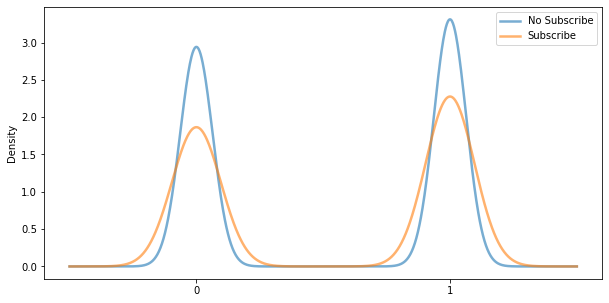

In [445]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)

fig = no_subs['housing'].plot(kind='kde', legend=True,label='No Subscribe',linewidth=2.5, alpha =0.6)
fig = si_subs['housing'].plot(kind='kde', legend=True, label='Subscribe', linewidth =2.5, alpha =0.6 )

plt.xticks(np.linspace(0,1,2)),
plt.show()

- Se ve una mayor cantidad de personas que deciden depositar en plazo fijo, si es que estos tienen un hogar.
- Esto muestra  que si la persona tiene estabilidad economica, como indica el ser propietario de un hogar, es más probable que deposite en plazo fijo.

## Education

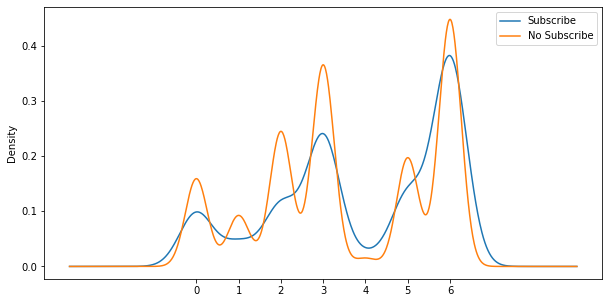

In [446]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)
fig = si_subs['education'].plot(kind='kde', legend=True, label='Subscribe')
fig = no_subs['education'].plot(kind='kde', legend=True, label='No Subscribe')
plt.xticks(np.linspace(0,6,7))
plt.show()

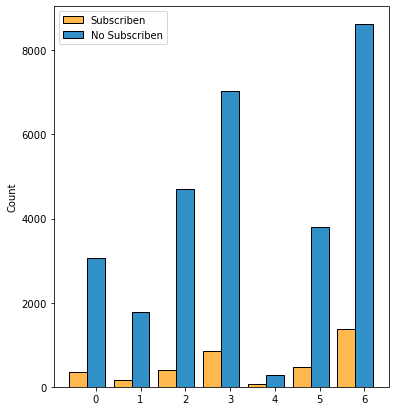

In [447]:
X = data.drop(columns='y').notnull()
y = data['y'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)
reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = reg.predict(X_test)
score_lr = round(accuracy_score(y_test,y_pred),4)*100

education_si = si_subs.groupby(['education']).count()
education_no = no_subs.groupby(['education']).count()
arr1 = education_si["y"].to_numpy()
arr2 = education_no["y"].to_numpy()
barWidth = 0.4
# The x position of bars
r1 = np.arange(len(arr1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(6,7)) 
# Create blue bars
plt.bar(r1, arr1, width = barWidth, color = '#ffb84d', edgecolor = 'black', label='Subscriben')
# Create cyan bars
plt.bar(r2, arr2, width = barWidth, color = '#3090C7', edgecolor = 'black', label='No Subscriben')
#
plt.xticks([r + barWidth for r in range(len(arr1))], ['0', '1', '2', '3', '4', '5', '6'])
plt.ylabel('Count')
plt.legend()
# Show graphic
plt.show()

-  Existe una clara tendencia a que en todos los niveles educativos se suscriben menos personas de las que se suscriben. Pero en los niveles educativos 5 y 6 que son "professional course" y "university degree" esta más cerca la relacion entre ambos. 
- Cuando la persona tiene un nivel educativo más alto, sera más pequeña la relacion entre las personas suscritas y no suscritas.

## Contact

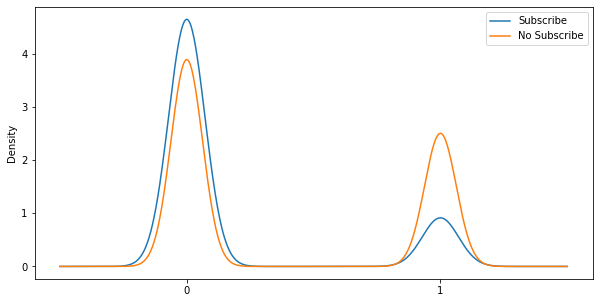

In [448]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)
fig = si_subs['contact'].plot(kind='kde', legend=True, label='Subscribe')
fig = no_subs['contact'].plot(kind='kde', legend=True, label='No Subscribe')
plt.xticks(np.linspace(0,1,2))
plt.show()

- Se ve que en las personas que estan registrados por telefono son menos las personas que se suscriben en relacion a la gente que no lo hace.
- En el caso de los celulares, más gente se suscribe de la que no. Esto puede ser por ser personas que estan menos activas ya que la gente que no presenta su celular normalmente son las que no se comunican hace tiempo. 
- También puede ser porque se hace más dificil comunicarse con el cliente ya que no puede estar en el sitio del telefono fijo, por lo tanto no se termina suscribiendo

## Duration

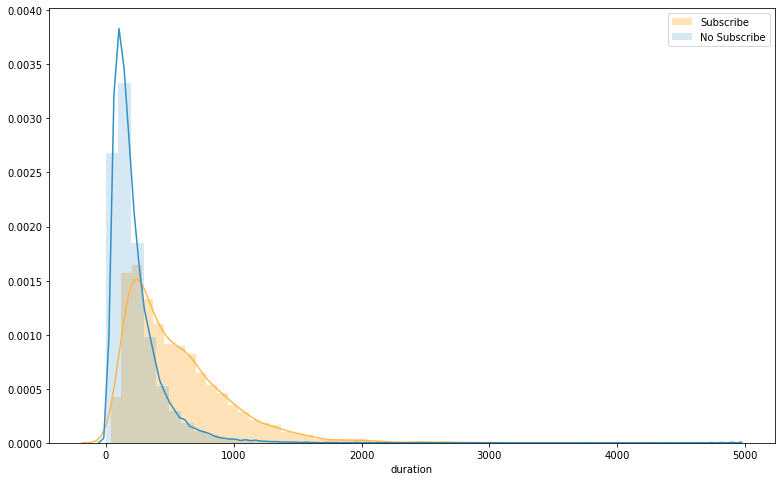

In [449]:
fig, ax = plt.subplots(figsize = (13,8))

sns.distplot( si_subs['duration'] , color="#ffb84d", label="Subscribe", ax = ax)
sns.distplot( no_subs['duration'] , color="#3090C7",hist_kws=dict(alpha=0.2), label="No Subscribe", ax = ax)
plt.legend()

## Euribor3m

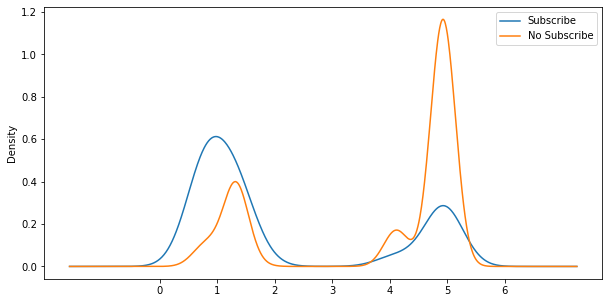

In [450]:
fig, ax = plt.subplots() 
fig.set_size_inches(10,5)
fig = si_subs['euribor3m'].plot(kind='kde', legend=True, label='Subscribe')
fig = no_subs['euribor3m'].plot(kind='kde', legend=True, label='No Subscribe')
plt.xticks(np.linspace(0,6,7))
plt.show()

- Hay una tendencia hacia que mas gente elige suscribirse al plan de largo plazo cuando el "euri" a tres meses es mas bajo ya que termina siendo mas atractivo depositar a largo plazo. 
- Cuando la tasa de interes a tres meses termina siendo alta, es menos atractivo depositar a largo plazo.

# Modelo

Utilizamos los datos normalizados


In [451]:
data_normalized.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.444444,0.25,0.112851,0.018182,0.0,0.0,1.0000,0.669135,0.338912,0.980957,1.000000,0.0
1,0.333333,0.1,1.0,0.0,0.5,0.5,1.0,0.222222,0.50,0.013013,0.000000,0.0,0.0,0.9375,0.698753,0.602510,0.957379,0.859735,0.0
2,0.666667,0.5,0.5,0.0,1.0,0.0,0.0,0.777778,0.00,0.026637,0.000000,0.0,0.0,0.0000,0.089634,1.000000,0.023804,0.203781,1.0


In [452]:
X = data_normalized.drop(columns='y')
y = data_normalized['y'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=101)



In [453]:
sy.init_printing()

## Random Forest Classifier

In [454]:
forrest = RandomForestClassifier(n_estimators = 200, criterion='entropy').fit(X_train, y_train)

y_pred_forrest = forrest.predict(X_test)


recall_forrest = round(recall_score(y_test, y_pred_forrest),7)*100

accuracy_forrest = round(accuracy_score(y_test,y_pred_forrest),7)*100

y_score_forrest = forrest.predict_proba(X_test)[:,1]

roc_forrest = round(roc_auc_score(y_test,y_score_forrest),7)*100

f1_forrest = round(f1_score(y_test,y_pred_forrest),7)*100

m_forrest = confusion_matrix(y_test, y_pred_forrest)

sy.Matrix(m_forrest)

⎡5660  209⎤
⎢         ⎥
⎣333   388⎦

## Logistic Regression

In [455]:
logr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

y_pred_logr = logr.predict(X_test)

recall_logr = round(recall_score(y_test,y_pred_logr),7)*100

accuracy_logr = round(accuracy_score(y_test,y_pred_logr),7)*100

y_score_logr = logr.predict_proba(X_test)[:,1]

roc_logr = round(roc_auc_score(y_test,y_score_logr),7)*100

f1_logr = round(f1_score(y_test,y_pred_logr),7)*100

m_logr = confusion_matrix(y_test, y_pred_logr)

sy.Matrix(m_logr)

⎡5740  129⎤
⎢         ⎥
⎣440   281⎦

## K Neighbors Classifier

In [456]:
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

recall_knn = round(recall_score(y_test,y_pred_knn),7)*100

accuracy_knn = round(accuracy_score(y_test,y_pred_knn),7)*100

y_score_knn = knn.predict_proba(X_test)[:,1]

roc_knn = round(roc_auc_score(y_test,y_score_knn),7)*100

f1_knn = round(f1_score(y_test,y_pred_knn),7)*100

m_knn = confusion_matrix(y_test, y_pred_knn)

sy.Matrix(m_knn)

⎡5704  165⎤
⎢         ⎥
⎣508   213⎦

## Decision Tree Classifier

In [518]:
tree=DecisionTreeClassifier(criterion="entropy",random_state=0).fit(X_train,y_train)


y_pred_tree = tree.predict(X_test)

recall_tree = round(recall_score(y_test,y_pred_tree),7)*100

accuracy_tree = round(accuracy_score(y_test,y_pred_tree),7)*100

y_score_tree = tree.predict_proba(X_test)[:,1]

roc_tree = round(roc_auc_score(y_test,y_score_tree),7)*100

f1_tree = round(f1_score(y_test,y_pred_tree),7)*100

m_tree = confusion_matrix(y_test, y_pred_tree)

sy.Matrix(m_tree)

⎡5507  362⎤
⎢         ⎥
⎣326   395⎦

In [519]:
s = {'Modelo': ['Random Forrest Classiier','Logisitic Regression', 'Decision Tree Classifier', 'KNeighbors Classifier'], 'Recall':[recall_forrest,recall_logr,recall_tree,recall_knn], 'Accuracy':[accuracy_forrest,accuracy_logr,accuracy_tree,accuracy_knn], 'ROC': [roc_forrest,roc_logr,roc_tree,roc_knn], 'F1':[f1_forrest,f1_logr,f1_tree,f1_knn]}
scoreDf = pd.DataFrame(data = s)
scoreDf.style.highlight_max()

,Modelo,Recall,Accuracy,ROC,F1
0,Random Forrest Classiier,53.814150,91.775420,94.454760,58.877090
1,Logisitic Regression,38.973650,91.365710,92.471570,49.690540
2,Decision Tree Classifier,54.785020,89.559940,74.308510,53.450610
3,KNeighbors Classifier,29.542300,89.787560,75.970290,38.762510


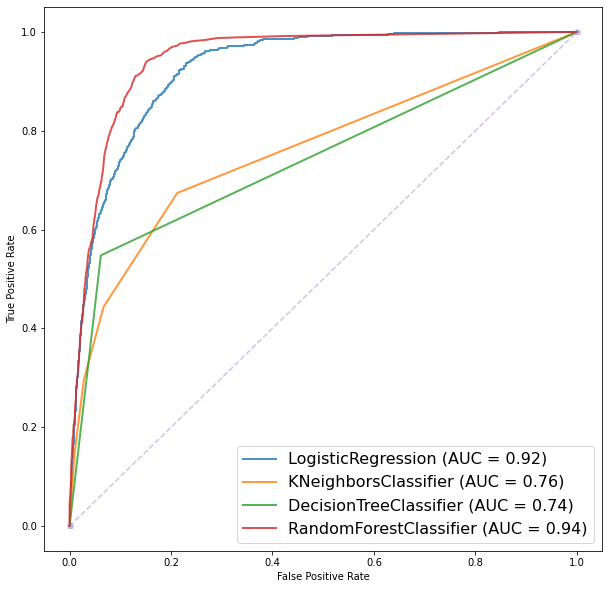

In [520]:
plt.figure(figsize=(10,10))
ax = plt.gca()
log_disp = plot_roc_curve(logr, X_test, y_test, ax=ax, alpha=0.8, linewidth = 2)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8, linewidth = 2)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax=ax, alpha =0.8, linewidth = 2)
forest_disp = plot_roc_curve(forrest, X_test, y_test, ax=ax, alpha=0.8, linewidth =2)
ax.plot([0, 1], [0, 1],'p--', alpha = 0.4)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

***

# Modelos con Reducción de Variables

### Pdays: 

- Presenta 0,31 de correlación de Pearson y 0,33 en Spearman. 
- Es de los que más correlación tiene con el "y". 

### Education:
- A simple vista, no encontramos ninguna correlacion con education
- Sin embargo, al probar con los modelos, vimos como incluirl education mejoraba sustancialmente nuestro modelo

### Euribor3m 
- Tiene un caso muy similar pero entre estas dos variables tienen 0,97 de correlación, por lo tanto, decidimos utilizar solo una.
- Tambien "nr.employed" tiene una gran correlación con emp.var.rate entonces decidimos utilizar solamente esta. 

### Duration: 
- Es la que tiene correlación más grande con la variable "y" con 0,41 en Pearson.
- No tiene variables muy asociadas a si misma como es el caso de "emp.var.rate".

### Previous: 
- Esta variable tiene una correlación de 0,24 en Pearson y 0,2 en Spearman. 
- En un principio la íbamos a reemplazar con "pdays" pero finalmente concluimos que 0,59 no es correlación suficiente para reemplazar una con la otra debía ser.  

### Cons.price.idx: 
- Teniendo -0,14 de correlación no es lo mejor, pero a medida que hay menor Consumer Price Index la relación entre los que no suscriben y suscriben comienza a achicarse hasta el punto de que los pasan los que si se suscriben.
- Pensamos en sustituirlo con emp.var.rate pero 0,77 de correlación no parece suficiente para sustituirlo en nuestro modelo.

<br>

***

<br>

In [479]:
data_reducida = data_normalized[["pdays","duration","previous","education","cons.price.idx","euribor3m","y"]]

In [480]:
data_reducida.head(3)

,pdays,duration,previous,education,cons.price.idx,euribor3m,y
0,0.0,0.112851,0.0,1.0,0.669135,0.980957,0.0
1,0.0,0.013013,0.0,0.0,0.698753,0.957379,0.0
2,0.0,0.026637,0.0,0.0,0.089634,0.023804,1.0


In [481]:
Xr = data_reducida.drop(columns='y')
yr = data_reducida['y'].astype('int')

X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size = 0.2, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=101)


## Random Forest Classifier

In [488]:
forrestr = RandomForestClassifier(n_estimators = 115, criterion='entropy').fit(X_trainr, y_trainr)

y_pred_forrestr = forrestr.predict(X_testr)


recall_forrestr = round(recall_score(y_testr, y_pred_forrestr),7)*100

accuracy_forrestr = round(accuracy_score(y_testr,y_pred_forrestr),7)*100

y_score_forrestr = forrestr.predict_proba(X_testr)[:,1]

roc_forrestr = round(roc_auc_score(y_testr,y_score_forrestr),7)*100

f1_forrestr = round(f1_score(y_testr,y_pred_forrestr),7)*100

m_forrestr = confusion_matrix(y_testr, y_pred_forrestr)

sy.Matrix(m_forrestr)

⎡5593  276⎤
⎢         ⎥
⎣318   403⎦

## Logistic Regression

In [489]:
logrr = LogisticRegression(max_iter=1000).fit(X_trainr, y_trainr)

y_pred_logrr = logrr.predict(X_testr)

recall_logrr = round(recall_score(y_testr,y_pred_logrr),7)*100

accuracy_logrr = round(accuracy_score(y_testr,y_pred_logrr),7)*100

y_score_logrr = logrr.predict_proba(X_testr)[:,1]

roc_logrr = round(roc_auc_score(y_testr,y_score_logrr),7)*100

f1_logrr = round(f1_score(y_testr,y_pred_logrr),7)*100

m_logrr = confusion_matrix(y_testr, y_pred_logrr)

sy.Matrix(m_logrr)

⎡5748  121⎤
⎢         ⎥
⎣459   262⎦

## K Neighbors Classifier

In [490]:
knnr = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2).fit(X_trainr,y_trainr)


y_pred_knnr = knnr.predict(X_testr)

recall_knnr = round(recall_score(y_testr,y_pred_knnr),7)*100

accuracy_knnr = round(accuracy_score(y_testr,y_pred_knnr),7)*100

y_score_knnr = knnr.predict_proba(X_testr)[:,1]

roc_knnr = round(roc_auc_score(y_testr,y_score_knnr),7)*100

f1_knnr = round(f1_score(y_testr,y_pred_knnr),7)*100

m_knnr = confusion_matrix(y_testr, y_pred_knnr)

sy.Matrix(m_knnr)

⎡5609  260⎤
⎢         ⎥
⎣369   352⎦

## Decision Tree Classifier

In [511]:
treer = DecisionTreeClassifier(criterion="entropy",random_state=0, max_depth=4).fit(X_trainr,y_trainr)


y_pred_treer = treer.predict(X_testr)

recall_treer = round(recall_score(y_testr,y_pred_treer),7)*100


accuracy_treer = round(accuracy_score(y_testr,y_pred_treer),7)*100

y_score_treer = treer.predict_proba(X_testr)[:,1]

roc_treer = round(roc_auc_score(y_testr,y_score_treer),7)*100

f1_treer = round(f1_score(y_testr,y_pred_treer),7)*100

m_treer = confusion_matrix(y_testr, y_pred_treer)

sy.Matrix(m_treer)

⎡5717  152⎤
⎢         ⎥
⎣420   301⎦

In [512]:
sr = {'Modelo': ['Random Forrest Classiier','Logisitic Regression', 'Decision Tree Classifier', 'KNeighbors Classifier'], 'Recall':[recall_forrestr,recall_logrr,recall_treer,recall_knnr], 'Accuracy':[accuracy_forrestr,accuracy_logrr,accuracy_treer,accuracy_knnr], 'ROC': [roc_forrestr,roc_logrr,roc_treer,roc_knnr], 'F1':[f1_forrestr,f1_logrr,f1_treer,f1_knnr]}
score_reducidoDf = pd.DataFrame(data = sr)


scoreDf.style.highlight_max().set_caption("Original")

,Modelo,Recall,Accuracy,ROC,F1
0,Random Forrest Classiier,53.814150,91.775420,94.454760,58.877090
1,Logisitic Regression,38.973650,91.365710,92.471570,49.690540
2,Decision Tree Classifier,54.785020,89.559940,74.308510,53.450610
3,KNeighbors Classifier,29.542300,89.787560,75.970290,38.762510


In [513]:
score_reducidoDf.style.highlight_max().set_caption("Reducido")

,Modelo,Recall,Accuracy,ROC,F1
0,Random Forrest Classiier,55.894590,90.986340,93.062650,57.571430
1,Logisitic Regression,36.338420,91.198790,91.369720,47.463770
2,Decision Tree Classifier,41.747570,91.320180,91.697650,51.277680
3,KNeighbors Classifier,48.821080,90.455240,88.869270,52.813200


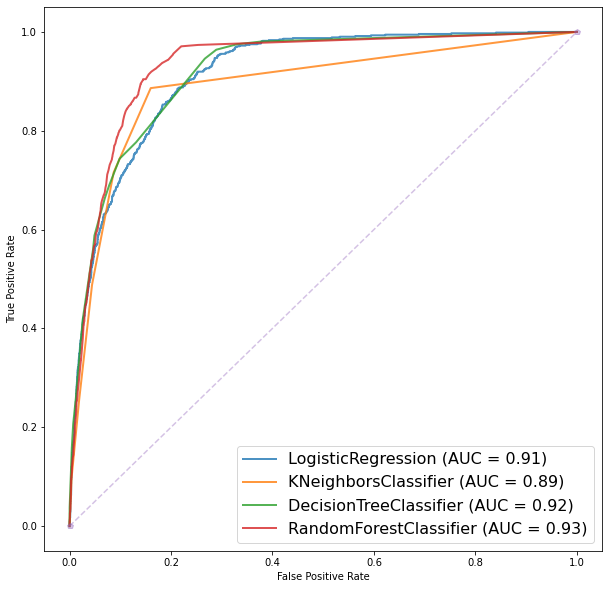

In [514]:
plt.figure(figsize=(10,10))
ax = plt.gca()
log_dispr = plot_roc_curve(logrr, X_testr, y_testr, ax=ax, alpha=0.8, linewidth = 2)
knn_dispr = plot_roc_curve(knnr, X_testr, y_testr, ax=ax, alpha=0.8, linewidth = 2)
tree_dispr = plot_roc_curve(treer, X_testr, y_testr, ax=ax, alpha =0.8, linewidth = 2)
forest_dispr = plot_roc_curve(forrestr, X_testr, y_testr, ax=ax, alpha=0.8, linewidth =2)
ax.plot([0, 1], [0, 1],'p--', alpha = 0.4)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

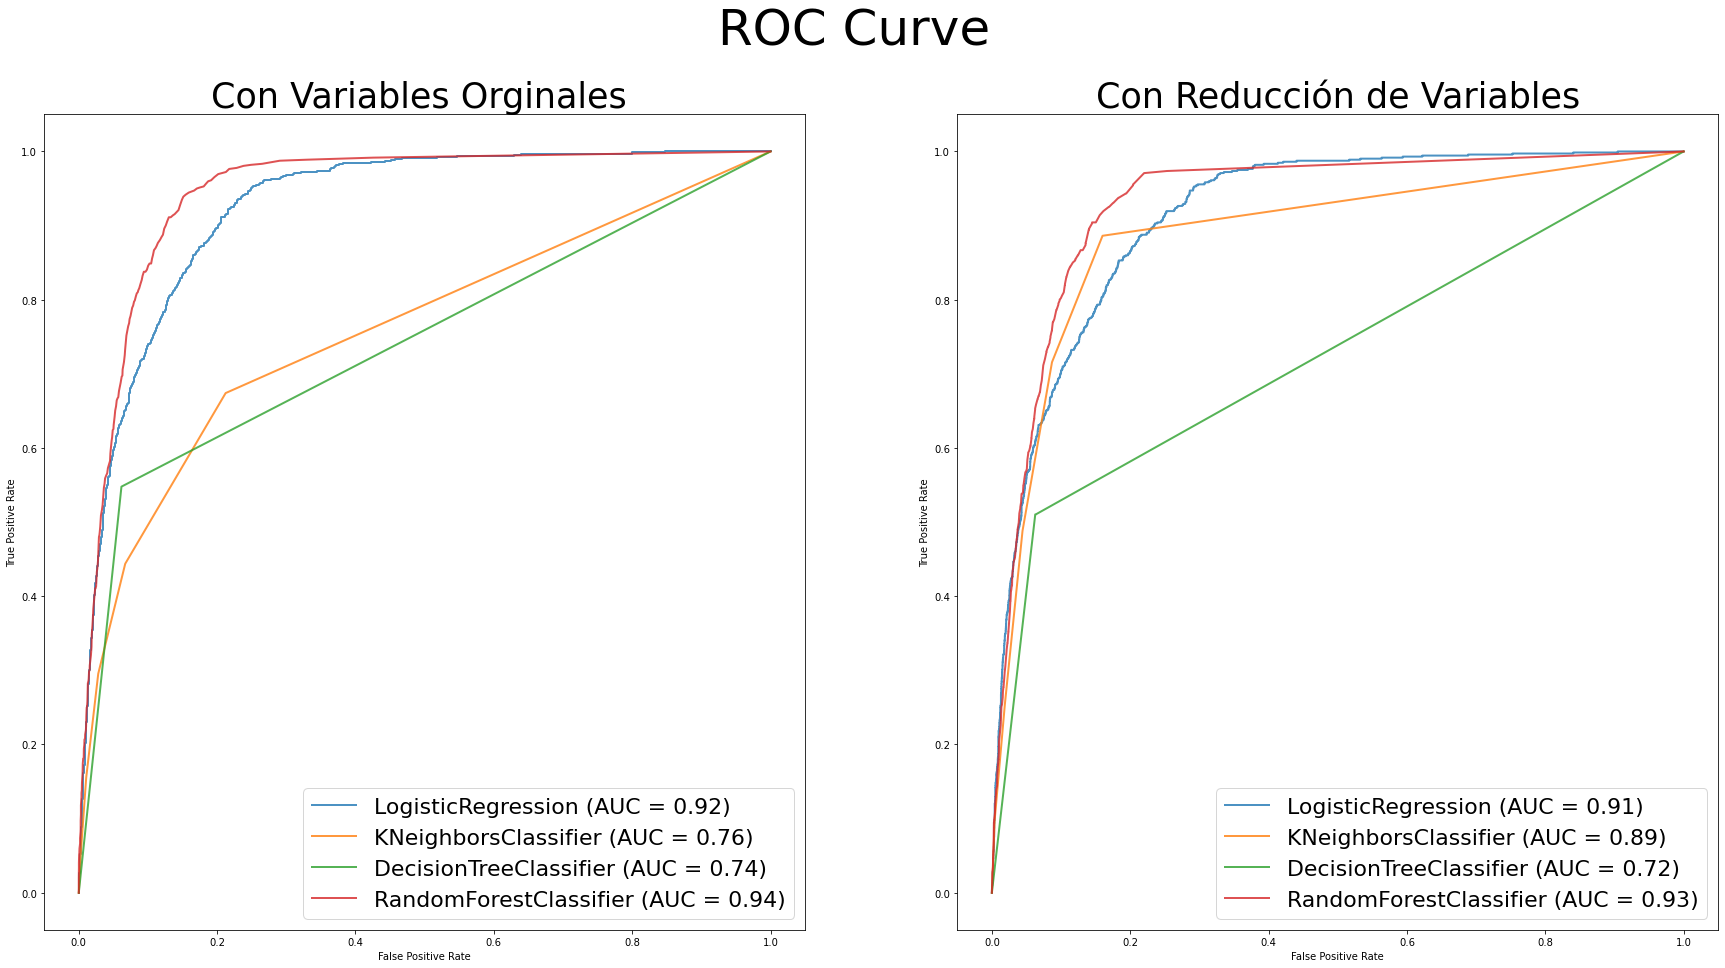

In [495]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30, 15))

#Los orginales

log_disp = plot_roc_curve(logr, X_test, y_test, ax=ax1, alpha=0.8, linewidth = 2)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax1, alpha=0.8, linewidth = 2)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax=ax1, alpha =0.8, linewidth = 2)
forest_disp = plot_roc_curve(forrest, X_test, y_test, ax=ax1, alpha=0.8, linewidth =2)


#Los reducidos
log_dispr = plot_roc_curve(logrr, X_testr, y_testr, ax=ax2, alpha=0.8, linewidth = 2)
knn_dispr = plot_roc_curve(knnr, X_testr, y_testr, ax=ax2, alpha=0.8, linewidth = 2)
tree_dispr = plot_roc_curve(treer, X_testr, y_testr, ax=ax2, alpha =0.8, linewidth = 2)
forest_dispr = plot_roc_curve(forrestr, X_testr, y_testr, ax=ax2, alpha=0.8, linewidth =2)

ax1.set_title('Con Variables Orginales ', fontsize = 35)
ax2.set_title('Con Reducción de Variables', fontsize = 35)

ax1.legend(loc = 'lower right', prop={'size': 22})
ax2.legend(loc = 'lower right', prop={'size': 22})
fig.suptitle('ROC Curve', fontsize=50)
plt.show()

### Conclusiones sobre modelos

- Ahora tenemos que decidir cual de los modelos que vimos es el mejor.

#### Existen dos tipos de errores:

- Falsos Positivos, lo que significa que el cliente no se subscribio pero nuestro modelo predijo que si.

- Falsos Negativo, lo que significa que el cliente se subscribio pero el modelo predijo que si.

#### Creemos que el peor error es el error del falso positivo, ya que pensamos que el cliente se v a suscribir para nuestro plazo fijo pero no lo esta y por eso puede ser que no lo consideremos para futuras campañas. 



## Random Forrest Classifier como nuestro modelo.

#### Elegimos este modelo por varias razones, estas incluyen:
- Posee el Recall más alto, metrica que consideramos la más valiosa ya que queremos obtener la menor cantidad de falsos positivos. 
- No le damos tanta importancia a Accuracy, ya que es bastante similar en todos los modelos.
- El ROC de Random Forrest es el mayor de todos los modelos, y esto es sumamente importante ya que la proporción de falso negativo es mayor y la de falso positivo es menor con este modelo. Esto se ve graficamente, como se acerca más al punto [0,1]
- Por otro lado, el F1 score tambien es el mayor de los modelos. Esto nos indica que es el modelo con mejor promedo entre precision y recall, ponderando asi los falsos positivos y falsos negativos dando una metrica más global.

- Aunque el Recall no es muy grande, hay que considerar que contamos con pocas instancias de personas que se suscriben y se espera que cuando se aumenten la cantidades clientes mejore este numero.

In [521]:
sy.Matrix(m_forrestr)

⎡5593  276⎤
⎢         ⎥
⎣318   403⎦

- [1,1] (En nuestro caso: 5593) = True Negative
- [2,1] (En nuestro caso: 318) = False Negative
- [1,2] (En nuestro caso: 276) =  False Positive
- [2,2] (En nuestro caso: 403) =  True Positive

# APENDICE


***


### Esto lo usamos para saber cual es el K  

In [522]:
#columns = data_normalized.columns
#k = 1
#while k<6:
#    imputer = KNNImputer(n_neighbors=k, weights="uniform")
#    datas = pd.DataFrame(data = imputer.fit_transform(data_normalized), columns = columns)
#    X = datas.drop(columns= ['y'])
#    y = datas['y'].astype('int')
#    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)
    
#    reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
#    y_pred = reg.predict(X_test)
    
    #knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    #knn.fit(X_train,y_train)
    
#    print(accuracy_score(y_test,y_pred))
#    k=k+1